# AI502/KSE527, Homework 01

This file is made by Jaehoon Oh, which is modified based on https://github.com/floydhub/regression

In [1]:
import torch
import torch.nn as nn
import torch.utils.data

# plotting libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
POLY_DEGREE = 4
torch.manual_seed(2020)
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5

In [3]:
def poly_desc(W, b):
    """Creates a string description of a polynomial."""
    result = 'y = '
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, len(W) - i)
    result += '{:+.2f}'.format(b[0])
    return result

In [4]:
print('==> The real function you should approximate:\t' + poly_desc(W_target.view(-1), b_target))

==> The real function you should approximate:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


---

In [5]:
def make_features(x):
    """Builds features i.e. a matrix with columns [x^4, x^3, x^2, x^1]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** (POLY_DEGREE+1-i) for i in range(1, POLY_DEGREE+1)], 1)

In [6]:
def f(x):
    """Approximated function."""
    return x.mm(W_target) + b_target[0]

In [7]:
def get_dataset(dataset_size):
    """Builds a batch i.e. (x, f(x)) pair."""
    random = torch.randn(dataset_size)
    x = make_features(random)
    y = f(x)
    dataset = list(zip(x, y))
    return dataset

In [8]:
dataset = get_dataset(200) # you can make as many as dataset as you want

In [9]:
#
# debug
#
print("W_target: \n")
print(W_target)
print("\n")
print("b_target: \n")
print(b_target)
print("\n")
print("dataset: \n")
print(dataset)

W_target: 

tensor([[ 6.1861],
        [-4.8020],
        [ 7.7076],
        [-2.0393]])


b_target: 

tensor([4.4029])


dataset: 



[(tensor([6.2834, 3.9687, 2.5067, 1.5832]), tensor([40.3072])), (tensor([ 1.8405, -1.5802,  1.3566, -1.1648]), tensor([36.2081])), (tensor([0.4151, 0.5172, 0.6443, 0.8027]), tensor([7.8166])), (tensor([ 0.8594, -0.8926,  0.9270, -0.9628]), tensor([23.1140])), (tensor([ 6.2216, -3.9393,  2.4943, -1.5793]), tensor([84.2530])), (tensor([ 0.0022, -0.0100,  0.0464, -0.2155]), tensor([5.2617])), (tensor([0.0490, 0.1042, 0.2215, 0.4706]), tensor([4.9531])), (tensor([0.0002, 0.0018, 0.0149, 0.1220]), tensor([4.2615])), (tensor([0.2548, 0.3587, 0.5048, 0.7105]), tensor([6.6989])), (tensor([ 0.0003, -0.0021,  0.0162, -0.1274]), tensor([4.7996])), (tensor([14.0503, -7.2571,  3.7484, -1.9361]), tensor([159.0084])), (tensor([0.4918, 0.5873, 0.7013, 0.8374]), tensor([8.3228])), (tensor([4.4075e-09, 5.4094e-07, 6.6389e-05, 8.1480e-03]), tensor([4.3868])), (tensor([ 0.0005, -0.0034,  0.0226, -0.1504]), tensor([4.9036])), (tensor([0.0005, 0.0035, 0.0231, 0.1521]), tensor([4.2574])), (tensor([17.5733, -

In [10]:
def compute_results(x, w, bias):
    x = make_features(x)
    return torch.squeeze(x.mm(w) + bias[0])

print(W_target)
compute_results(torch.linspace(-10, 10, steps=1000), W_target, b_target)

tensor([[ 6.1861],
        [-4.8020],
        [ 7.7076],
        [-2.0393]])


tensor([6.7459e+04, 6.6933e+04, 6.6410e+04, 6.5891e+04, 6.5374e+04, 6.4861e+04,
        6.4350e+04, 6.3843e+04, 6.3338e+04, 6.2837e+04, 6.2338e+04, 6.1843e+04,
        6.1350e+04, 6.0861e+04, 6.0374e+04, 5.9890e+04, 5.9409e+04, 5.8932e+04,
        5.8457e+04, 5.7984e+04, 5.7515e+04, 5.7049e+04, 5.6585e+04, 5.6125e+04,
        5.5667e+04, 5.5212e+04, 5.4759e+04, 5.4310e+04, 5.3863e+04, 5.3419e+04,
        5.2978e+04, 5.2540e+04, 5.2104e+04, 5.1671e+04, 5.1241e+04, 5.0813e+04,
        5.0388e+04, 4.9966e+04, 4.9547e+04, 4.9130e+04, 4.8715e+04, 4.8304e+04,
        4.7895e+04, 4.7488e+04, 4.7085e+04, 4.6683e+04, 4.6285e+04, 4.5889e+04,
        4.5495e+04, 4.5104e+04, 4.4716e+04, 4.4330e+04, 4.3946e+04, 4.3565e+04,
        4.3187e+04, 4.2811e+04, 4.2437e+04, 4.2066e+04, 4.1698e+04, 4.1332e+04,
        4.0968e+04, 4.0607e+04, 4.0248e+04, 3.9891e+04, 3.9537e+04, 3.9185e+04,
        3.8836e+04, 3.8489e+04, 3.8144e+04, 3.7801e+04, 3.7461e+04, 3.7124e+04,
        3.6788e+04, 3.6455e+04, 3.6124e+

In [11]:
def plot_graphs(W_target, b_target, W_learned, b_learned, epoch_num):
    x = torch.linspace(-10, 10, steps=1000)
    fig = plt.figure(figsize=(10, 5))

    #plt.subplot(1, 2, 1)
    #plt.ylim(ymax = 100, ymin = -10)
    #plt.xlim(xmax = 10, xmin = -10)
    plt.title("Function plot - epoch number: {}".format(epoch_num))
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.grid()
    plt.plot(x.numpy(), compute_results(torch.linspace(-10, 10, steps=1000), W_target, b_target).numpy(), label="Actual function")
    plt.plot(x.numpy(), compute_results(x, torch.unsqueeze(torch.squeeze(W_learned), 1), b_learned), label="Learned function")
    plt.legend()
    plt.show()

#plot_graphs(W_target, b_target, net.fc.weight.data, net.fc.bias.data)
#print(net.fc.weight.data)

---

In [12]:
num_epochs = 500
batch_size = 50
learning_rate = 0.001
criterion = nn.SmoothL1Loss()

In [13]:
dataset_loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

---

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(W_target.size(0), 1)
        
        # For fixing the initial weights and bias
        self.fc.weight.data.fill_(0.)
        self.fc.bias.data.fill_(0.)
        
    def forward(self, x):
        output = self.fc(x)
        return output

---

In [15]:
def fit(model,loader,criterion,learning_rate,num_epochs, graphs=False):
    model.train()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    loss_list = []
    for epoch in range(num_epochs):
        accum_loss = 0
        num_batch = 0
        for i, data in enumerate(loader):
            if torch.cuda.is_available():
                x = data[0].type(torch.FloatTensor).cuda()
                y = data[1].type(torch.FloatTensor).cuda()
            else:
                x = data[0].type(torch.FloatTensor)
                y = data[1].type(torch.FloatTensor)   
                
            y_hat = model(x)
            loss = criterion(y_hat, y)
            
            accum_loss += loss.item()
            num_batch += 1
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        loss_list.append(accum_loss/num_batch)
        if graphs==True and (epoch+1) in [5,10,20,100,200, 500]:
            plot_graphs(W_target, b_target, model.fc.weight.data, model.fc.bias.data, epoch+1)
            print('==> Learned function:\t' + poly_desc(model.fc.weight.data.view(-1), model.fc.bias.data))
            print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))
        
    return loss_list

---

In [16]:
net = Net().cuda() if torch.cuda.is_available() else Net()
print('==> Initial function:\t' + poly_desc(net.fc.weight.data.view(-1), net.fc.bias.data))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

==> Initial function:	y = +0.00 x^4 +0.00 x^3 +0.00 x^2 +0.00 x^1 +0.00
==> Actual function:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


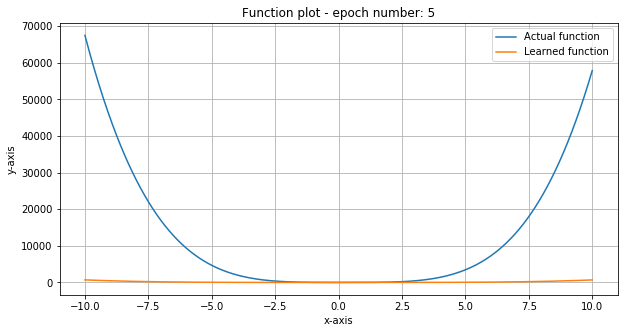

==> Learned function:	y = +0.07 x^4 -0.00 x^3 +0.02 x^2 -0.00 x^1 +0.02
==> Actual function:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


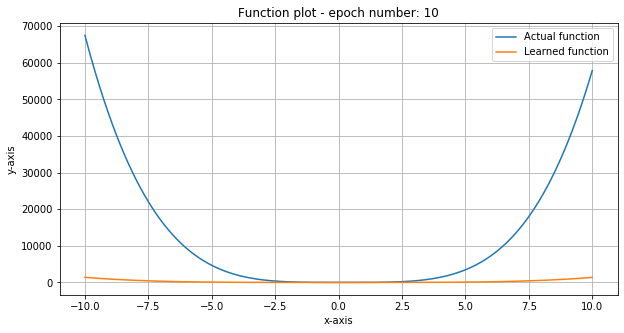

==> Learned function:	y = +0.14 x^4 -0.01 x^3 +0.04 x^2 -0.00 x^1 +0.04
==> Actual function:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


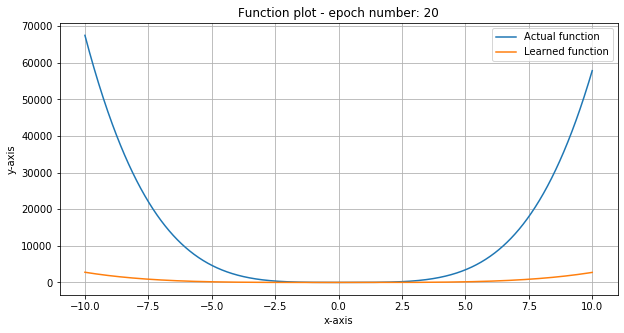

==> Learned function:	y = +0.28 x^4 -0.02 x^3 +0.08 x^2 -0.00 x^1 +0.08
==> Actual function:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


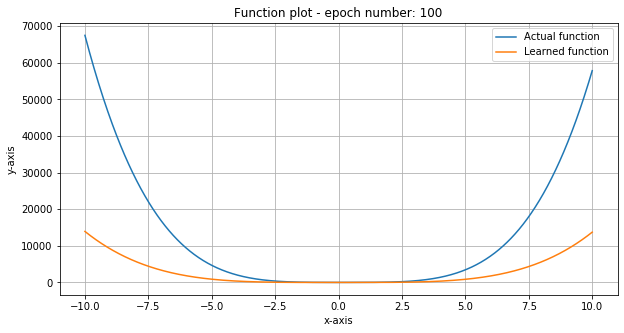

==> Learned function:	y = +1.38 x^4 -0.10 x^3 +0.41 x^2 -0.01 x^1 +0.40
==> Actual function:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


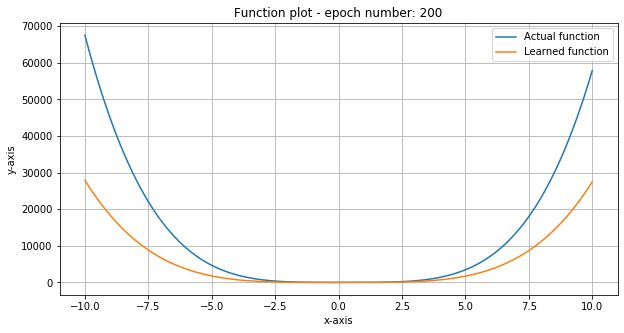

==> Learned function:	y = +2.76 x^4 -0.20 x^3 +0.82 x^2 -0.02 x^1 +0.80
==> Actual function:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


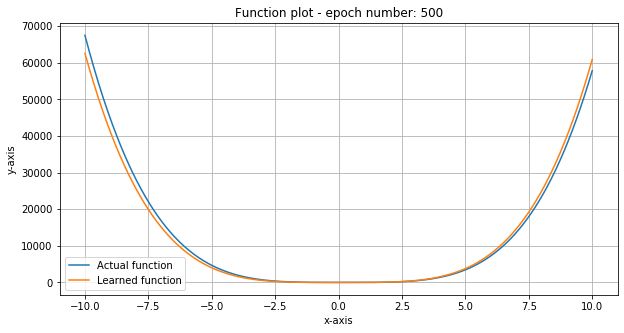

==> Learned function:	y = +6.15 x^4 -0.85 x^3 +1.87 x^2 -0.14 x^1 +1.95
==> Actual function:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


In [17]:
# train
loss_list = fit(net,dataset_loader,criterion,learning_rate,num_epochs, graphs=True)

In [18]:
print('==> Learned function:\t' + poly_desc(net.fc.weight.data.view(-1), net.fc.bias.data))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

==> Learned function:	y = +6.15 x^4 -0.85 x^3 +1.87 x^2 -0.14 x^1 +1.95
==> Actual function:	y = +6.19 x^4 -4.80 x^3 +7.71 x^2 -2.04 x^1 +4.40


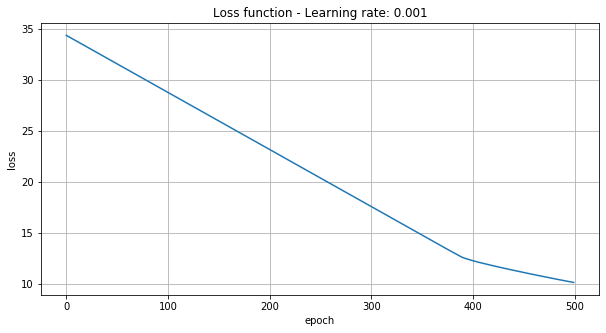

In [19]:
fig = plt.figure(figsize=(10, 5))
plt.title("Loss function - Learning rate: {}".format(learning_rate))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.plot(list(range(num_epochs)), loss_list)
plt.show()